# "**Portofolio Optimisation**".

## Problem Definition
> Applying a classical mean-variance to an investment in a real financial market. Allowing the invester to select a stock and shares to invest in.

The task is divided into 4 steps:

### 1.Data
select any 5 stocks from stock market and grab the historical data from ***01-01-2020*** to ***12-31-2020***
where it has historical prices of each stock for each transaction day,
The stocks have been picked from: https://finance.yahoo.com

  The 5 random stocks Which we are going to use is:

  * Centennial Resource Development, Inc.(CDEV)
  * Intel Corporation (INTC)
  * Twitter, Inc. (TWTR)
  * United Airlines Holdings, Inc. (UAL)
  * Uber Technologies, Inc.(UBER)	

###2. Evaluation
Take out the mean of n-stocks and co-variance between n-stocks.

###3. Model
 After Analysing all stocks make a model to invest for each stocks shares with one unit which is equal to one million.

###4. Result 
Describe the final values of porfolio (n-stocks) holding till ***12-31-2021***

In [4]:
# Import Important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.4f' % x)
sns.set_style("darkgrid")

In [5]:
# Import Datasets of 5 stocks
cdev = pd.read_csv("CDEV.csv",index_col=["Date"],parse_dates=['Date'])
intc = pd.read_csv("INTC.csv",index_col=["Date"],parse_dates=['Date'])
twtr = pd.read_csv("TWTR.csv",index_col=["Date"],parse_dates=['Date'])
ual =  pd.read_csv("UAL.csv", index_col=["Date"],parse_dates=['Date'])
uber = pd.read_csv("UBER.csv",index_col=["Date"],parse_dates=['Date'])


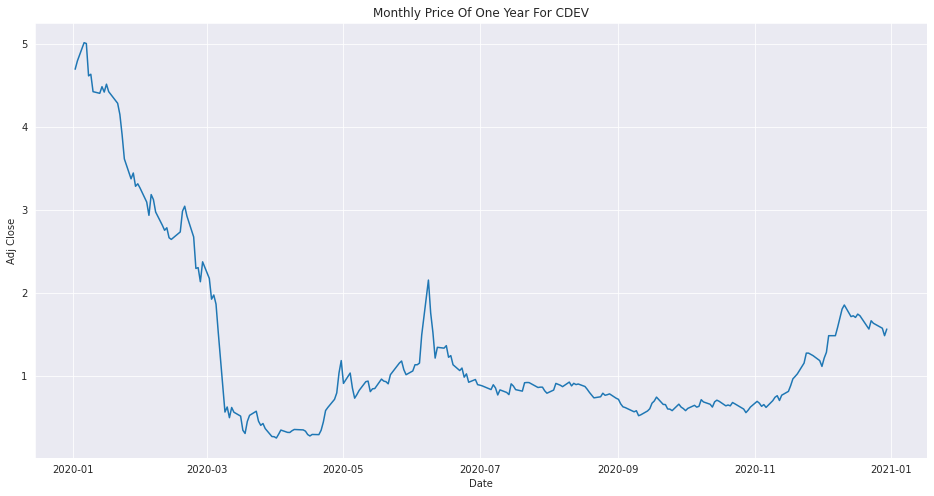

In [45]:
# Let's plot the adj price of CDEV X=date and on Y= Price
plt.figure(figsize=(16,8))
sns.lineplot(x='Date',y='Adj Close',data=cdev)
plt.title("Monthly Price Of One Year For CDEV");

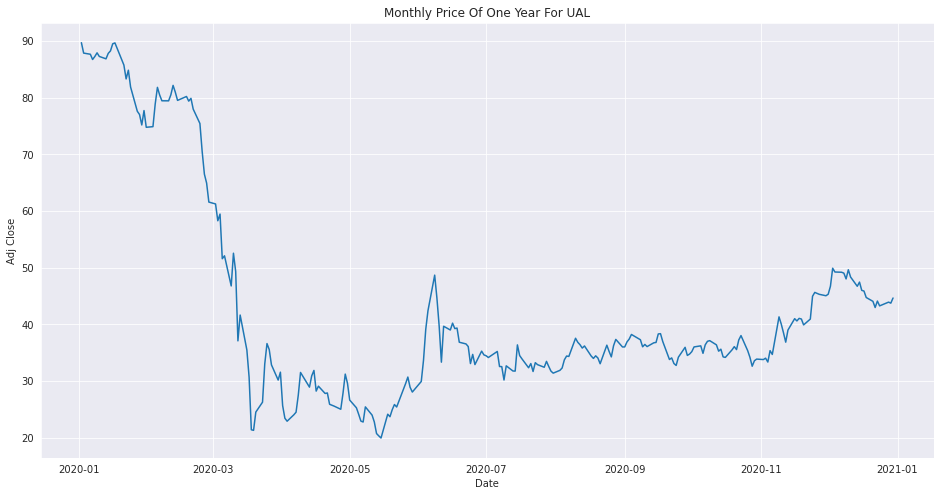

In [46]:
# Let's plot the adj price of UAL X=date and on Y= Price
plt.figure(figsize=(16,8))
sns.lineplot(x='Date',y='Adj Close',data=ual)
plt.title("Monthly Price Of One Year For UAL");

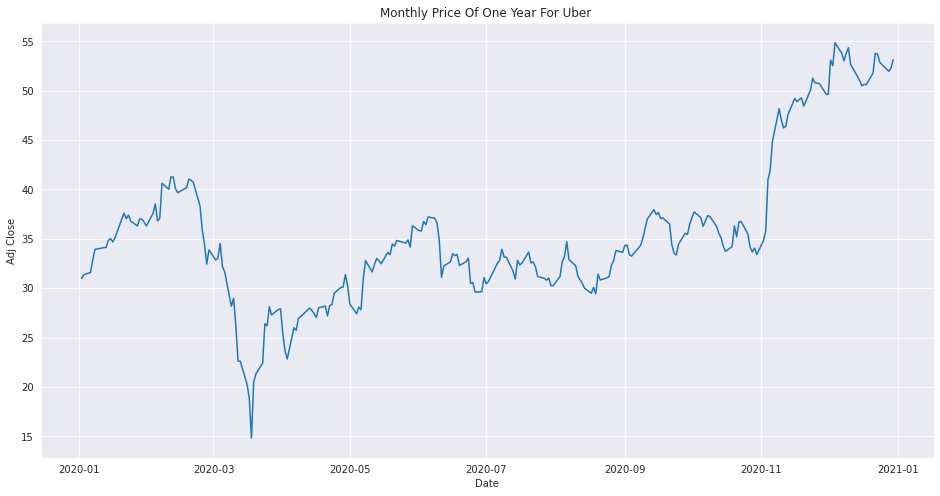

In [47]:
# Let's plot the adj price of UBER X=date and on Y= Price
plt.figure(figsize=(16,8))
sns.lineplot(x='Date',y='Adj Close',data=uber)
plt.title("Monthly Price Of One Year For Uber ");

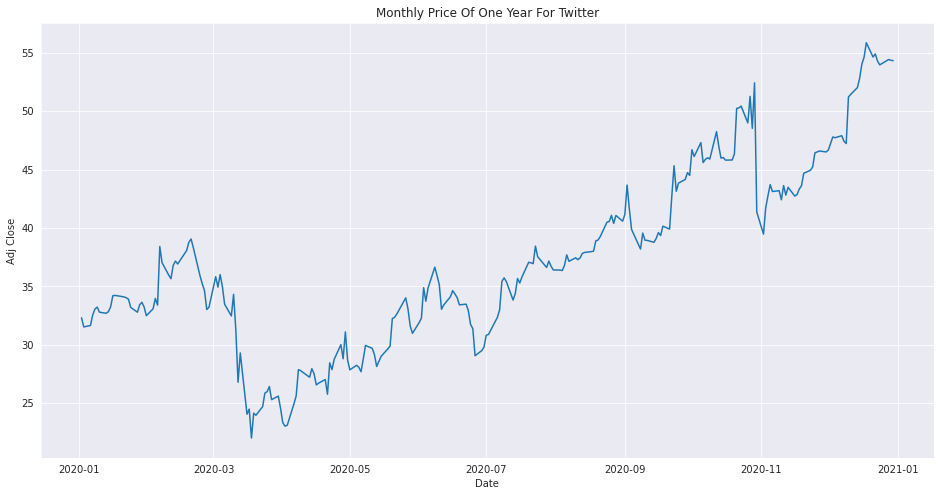

In [48]:
# Let's plot the adj price of TWITTER X=date and on Y= Price
plt.figure(figsize=(16,8))
sns.lineplot(x='Date',y='Adj Close',data=twtr)
plt.title("Monthly Price Of One Year For Twitter");

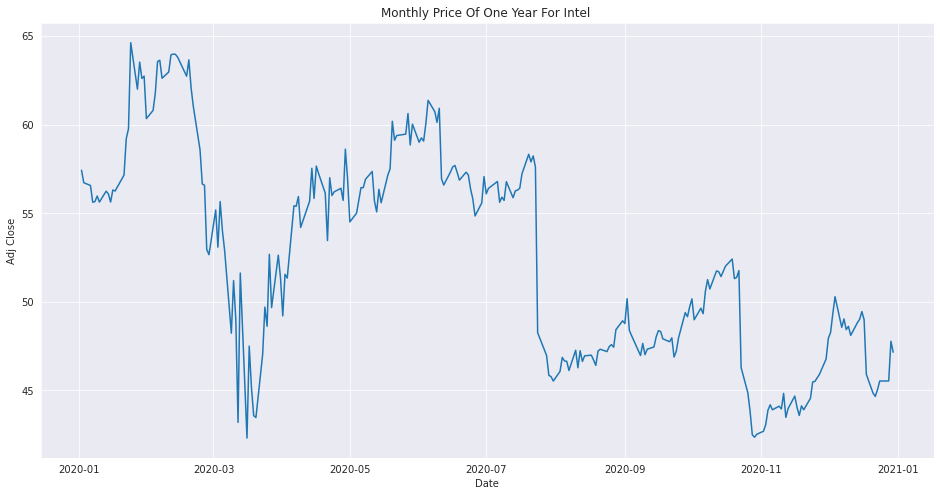

In [49]:
# Let's plot the adj price of INTEL X=date and on Y= Price
plt.figure(figsize=(16,8))
sns.lineplot(x='Date',y='Adj Close',data=intc)
plt.title("Monthly Price Of One Year For Intel ");

#### Let's look into final closing prices for all stocks , I picked directly closing prices on 12-31-2021 from finance/yahoo.com.

In [35]:
close_2021 = {"UAL": 44.13,
              "INTEL":51.35,
              "TWITTER":44.46,
              "CDEV":6.05,
              "UBER":42.66}

close_2021_df = pd.DataFrame(close_2021,index=["Adj Close Price"])

In [37]:
close_2021_df

,UAL,INTEL,TWITTER,CDEV,UBER
Adj Close Price,44.1300,51.3500,44.4600,6.0500,42.6600


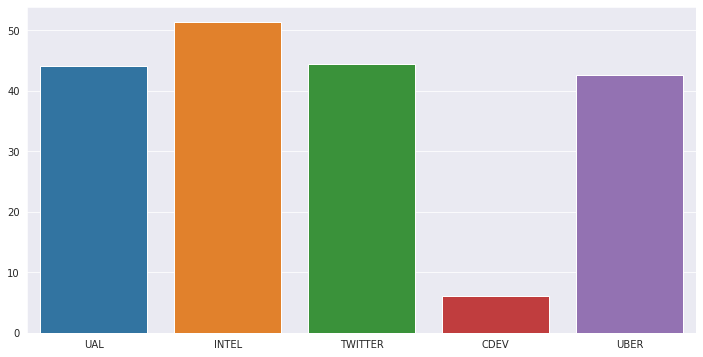

In [44]:
# Let's plot with barplot
plt.figure(figsize=(12,6))
sns.barplot(data=close_2021_df)

### Looking into the above graphs we can formally see that among 5 only two (Uber and Twitter) had pumped in the last quater of 2020
To get a perfect stock to invest in let's explore further more

In [13]:
# Taking the average of all 5 stocks
avg_ual  = ual["Adj Close"].mean()
avg_uber = uber['Adj Close'].mean()
avg_twtr = twtr['Adj Close'].mean()
avg_intc = intc['Adj Close'].mean()
avg_cdev = cdev['Adj Close'].mean()

# Saving into the dictionary
average = {"UAL Avg Price": avg_ual,
           "UBER Avg Price": avg_uber,
           "TWITTER Avg Price": avg_twtr,
           "INTEL Avg Price": avg_ual,
           "CDEV Avg Price": avg_cdev}

In [14]:
# let's change into DataFrame 
average_df = pd.DataFrame(average,index=["Adj Average Prices"])

In [15]:
average_df

,UAL Avg Price,UBER Avg Price,TWITTER Avg Price,INTEL Avg Price,CDEV Avg Price
Adj Average Prices,42.6521,35.4502,37.1486,42.6521,1.2971


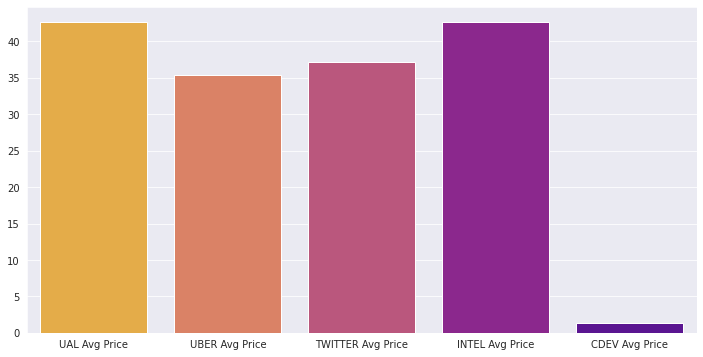

In [16]:
# Let's plot the adj price of CDEV X=date and on Y= Price
plt.figure(figsize=(12,6))
sns.barplot(data=average_df,palette="plasma_r")

In [17]:
average

{'CDEV Avg Price': 1.297059523809524,
 'INTEL Avg Price': 42.65206343650791,
 'TWITTER Avg Price': 37.14857136507936,
 'UAL Avg Price': 42.65206343650791,
 'UBER Avg Price': 35.450198488095225}

### As we have calculated the average prices of all 5 stocks of a year we can't certainly draw a decision which stock is good for investment.

To make it more clear we need to calculate the return of each stocks (return is the increase of stock value).

In [18]:
# Calculating the Return for each stocks using pandas built-in function 'pct_change()' and then taking out the mean of all 5 stocks
rtn_ual  = ual["Adj Close"].pct_change()
rtn_uber = uber['Adj Close'].pct_change()
rtn_twtr = twtr['Adj Close'].pct_change()
rtn_intc = intc['Adj Close'].pct_change()
rtn_cdev = cdev['Adj Close'].pct_change()


In [19]:
# Let's Save them into dictionary and later change into Dataframe
returns = {"UAL Return": rtn_ual,
           "UBER Return": rtn_uber,
           "TWITTER Return": rtn_twtr,
           "INTEL Return": rtn_ual,
           "CDEV Return": rtn_cdev}

 # Into Dataframe     
returns_df = pd.DataFrame(returns)

In [20]:
returns_df.head()

,UAL Return,UBER Return,TWITTER Return,INTEL Return,CDEV Return
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.0205,0.0123,-0.0241,-0.0205,0.0213
2020-01-06,-0.0023,0.0067,0.0038,-0.0023,0.0459
2020-01-07,-0.0106,0.0389,0.0284,-0.0106,-0.0020
2020-01-08,0.0061,0.0341,0.0157,0.0061,-0.0780


#### Let's find the Co-Variance

In [21]:
# Let's find the coveriance matrix
returns_df.cov()

,UAL Return,UBER Return,TWITTER Return,INTEL Return,CDEV Return
UAL Return,0.0043,0.0015,0.0011,0.0043,0.0025
UBER Return,0.0015,0.0022,0.0008,0.0015,0.0017
TWITTER Return,0.0011,0.0008,0.0015,0.0011,0.0009
INTEL Return,0.0043,0.0015,0.0011,0.0043,0.0025
CDEV Return,0.0025,0.0017,0.0009,0.0025,0.0115


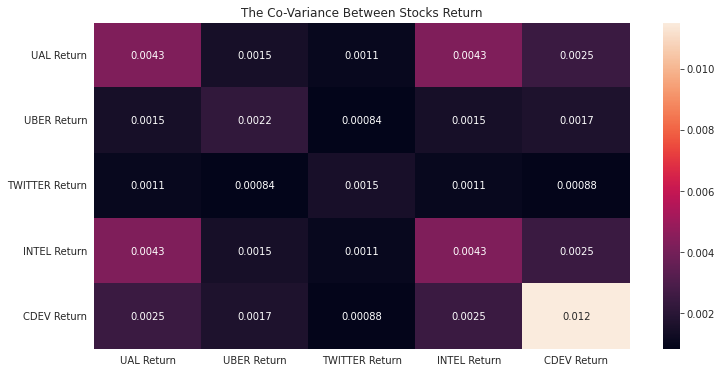

In [22]:
# Let's plot to see more in details
plt.figure(figsize=(12,6))
sns.heatmap(returns_df.cov(),annot=True)
plt.title("The Co-Variance Between Stocks Return");

In [23]:
# Taking out the mean of Each stock of return
avg_rtn_ual  = ual["Adj Close"].pct_change().mean()
avg_rtn_uber = uber['Adj Close'].pct_change().mean()
avg_rtn_twtr = twtr['Adj Close'].pct_change().mean()
avg_rtn_intc = intc['Adj Close'].pct_change().mean()
avg_rtn_cdev = cdev['Adj Close'].pct_change().mean()

In [24]:
# Let's Save them into dictionary and later change into Dataframe
avg_returns = {"UAL Return Mean": avg_rtn_ual,
           "UBER Return Mean": avg_rtn_uber,
           "TWITTER Return Mean": avg_rtn_twtr,
           "INTEL Return Mean": avg_rtn_ual,
           "CDEV Return Mean": avg_rtn_cdev}

# Into Dataframe
avg_returns_df = pd.DataFrame(avg_returns,index=["Return Mean"])

In [50]:
avg_returns_df

,UAL Return Mean,UBER Return Mean,TWITTER Return Mean,INTEL Return Mean,CDEV Return Mean
Return Mean,-0.0006,0.0032,0.0029,-0.0006,0.0018


### As there is 3 positive return among 5

## Final Portion And Result

### Now We Will Compute The Number Of Shares to Buy For Each Stock Considering One Unit is millionth, divide on 5 stocks based on return value

#### Here I have divided million on 5 stocks looking into the aspect of returned value of each stock

uber = 36,000,0

twitter = 32,000,0 

CDEV = 20,000,0

Intel = 60,000

UAL = 60,000

### And here I Assigned shares for each stock while considering the price and number of shares

> **UBER**:  Shares to buy *6773*

> **TWITTER**: Shares to buy *5889*

> **CDEV**:  Shares to buy *128205*

> **Intel**: Shares to buy  *1272*

> **UAL**: Shares to buy 1343

### If we have the same portfolio as above holding all the shares till *31-12-2021*, let's calculate the value and report the final value of portfolio

In [53]:
# Let's call back the datafram which we created earlier for 31-12-2021 closing price
close_2021_df

,UAL,INTEL,TWITTER,CDEV,UBER
Adj Close Price,44.1300,51.3500,44.4600,6.0500,42.6600


In [55]:
# Let's Create the dictionary for buying prices
report = {"UAL":44.65,
          "INTEL": 47.16,
          "TWITTER":54.33,
          "CDEV":1.56,
          "UBER":53.15}

# Saving them into dataframe
report_df = pd.DataFrame(report,index=["Buying Price"])
report_df

,UAL,INTEL,TWITTER,CDEV,UBER
Buying Price,44.6500,47.1600,54.3300,1.5600,53.1500


In [58]:
final_report = pd.concat([report_df,close_2021_df], sort=False)

In [59]:
final_report

,UAL,INTEL,TWITTER,CDEV,UBER
Buying Price,44.6500,47.1600,54.3300,1.5600,53.1500
Adj Close Price,44.1300,51.3500,44.4600,6.0500,42.6600


In [61]:
## Let's calculate the return value of portfolio
rtn_final_report= final_report.pct_change()
rtn_final_report

,UAL,INTEL,TWITTER,CDEV,UBER
Buying Price,NaN,NaN,NaN,NaN,NaN
Adj Close Price,-0.0116,0.0888,-0.1817,2.8782,-0.1974


## We can conclude that only two stocks values have increased if we hold the portfolio unitl ***31-12-21*** and we can make decision on for future buying of shares

In [62]:
# filepaths = [f for f in os.listdir(".") if f.endswith('.csv')]
# df = pd.concat(map(pd.read_csv, filepaths))